In [1]:
import numpy as np
import pandas as pd
from dfply import *
import seaborn as sns
import matplotlib
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [16]:
# 환경설정
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [118]:
# 데이터 불러오기
weather = pd.read_csv('data/weather_v1.csv', low_memory=False, dtype={
    'area': str,
    'temp_QCFlag': str,
    'prec_QCFlag': str,
    'ws_QCFlag': str,
    'wd_QCFlag': str,
    'humid_QCFlag': str,
    'landP_QCFlag': str,
    'seaP_QCFlag': str,
    'suntime_QCFlag': str,
    'sfctemp_QCFlag': str,
})
lookupTable_area = pd.read_csv('data/lookupTable_area.csv')
hourly_smp = pd.read_csv('data/hourly_smp_v1.csv')
target = pd.read_csv('data/target_v1.csv')

In [280]:
# SMP 일별 집계
daily_smp = hourly_smp \
    >> mutate(date=X.datetime.str.slice(0,10)) \
    >> group_by(X.date) \
    >> summarise(smp_mean=X.smp.mean(), smp_max=X.smp.max(), smp_min=X.smp.min())
daily_smp['date'] = pd.to_datetime(daily_smp['date'])

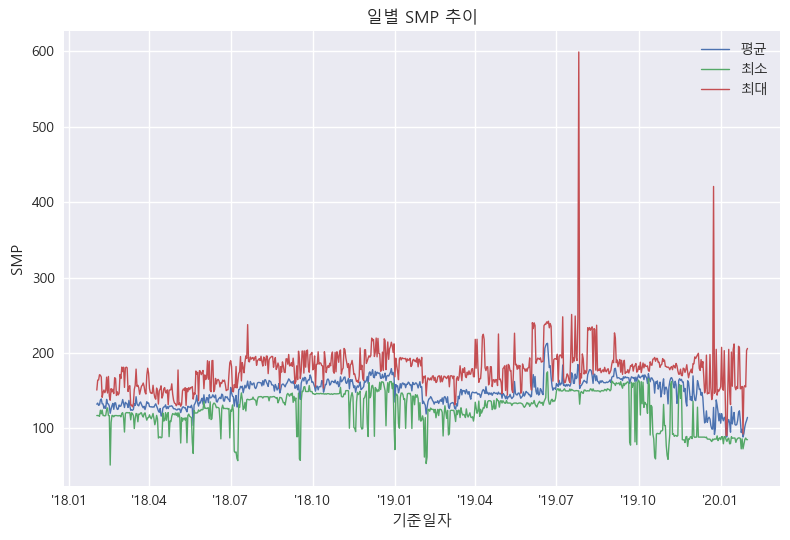

In [281]:
# 일별 SMP 시각화
fig, ax = plt.subplots(1,1)

ax.plot(daily_smp['date'], daily_smp['smp_mean'], label='평균', lw=1)
ax.plot(daily_smp['date'], daily_smp['smp_min'], label='최소', lw=1)
ax.plot(daily_smp['date'], daily_smp['smp_max'], label='최대', lw=1)

ax.set_xlabel('기준일자')
ax.set_ylabel('SMP')
ax.set_title('일별 SMP 추이')
ax.xaxis.set_minor_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))
ax.legend()

plt.tight_layout()
plt.show()

In [282]:
# 제주 기상데이터 전처리
daily_weather_jeju = weather \
    >> mask(X.area == '184') \
    >> mask(~X.temp_QCFlag.isin(['9.0'])
            & ~X.prec_QCFlag.isin(['9.0'])
            & ~X.ws_QCFlag.isin(['9.0'])
            & ~X.wd_QCFlag.isin(['9.0'])
            & ~X.humid_QCFlag.isin(['9.0'])
            & ~X.landP_QCFlag.isin(['9.0'])
            & ~X.seaP_QCFlag.isin(['9.0'])
            & ~X.suntime_QCFlag.isin(['9.0'])
            & ~X.sfctemp_QCFlag.isin(['9.0'])) \
    >> drop(X.temp_QCFlag, X.prec_QCFlag, X.ws_QCFlag, X.wd_QCFlag, X.humid_QCFlag,
            X.landP_QCFlag, X.seaP_QCFlag, X.suntime_QCFlag, X.sfctemp_QCFlag)

In [283]:
# 기온 일별 집계
daily_temp_jeju = daily_weather_jeju \
    >> mutate(date=X.datetime.str.slice(0,10)) \
    >> group_by(X.date) \
    >> summarise(temp_mean=X.temp.mean(), temp_max=X.temp.max(), temp_min=X.temp.min())
daily_temp_jeju['date'] = pd.to_datetime(daily_temp_jeju['date'])

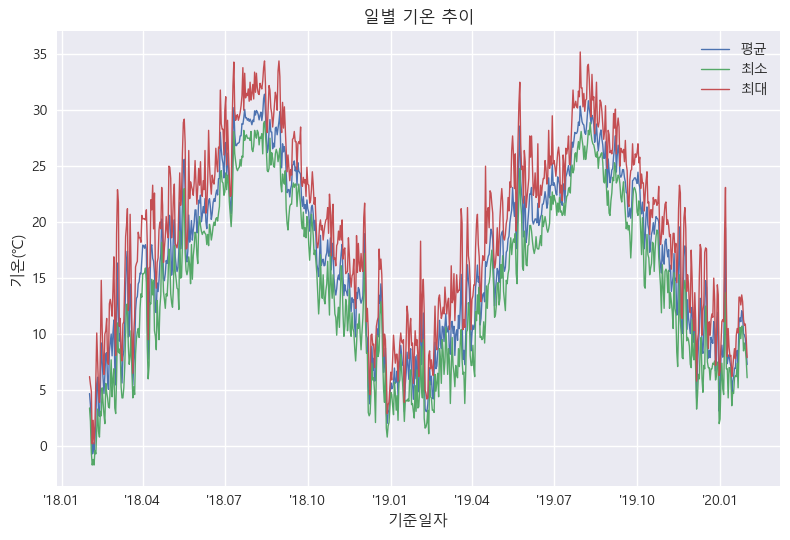

In [284]:
# 제주 일별 기온 시각화
fig, ax = plt.subplots(1,1)

ax.plot(daily_temp_jeju['date'], daily_temp_jeju['temp_mean'], label='평균', lw=1)
ax.plot(daily_temp_jeju['date'], daily_temp_jeju['temp_min'], label='최소', lw=1)
ax.plot(daily_temp_jeju['date'], daily_temp_jeju['temp_max'], label='최대', lw=1)

ax.set_xlabel('기준일자')
ax.set_ylabel('기온(℃)')
ax.set_title('일별 기온 추이')
ax.xaxis.set_minor_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))
ax.legend()

plt.tight_layout()
plt.show()

In [285]:
# 풍속 일별 집계
daily_ws_jeju = daily_weather_jeju \
    >> mask(~X.ws.isna()) \
    >> mutate(date=X.datetime.str.slice(0,10)) \
    >> group_by(X.date) \
    >> summarise(ws_mean=X.ws.mean(), ws_max=X.ws.max(), ws_min=X.ws.min())
daily_ws_jeju['date'] = pd.to_datetime(daily_ws_jeju['date'])

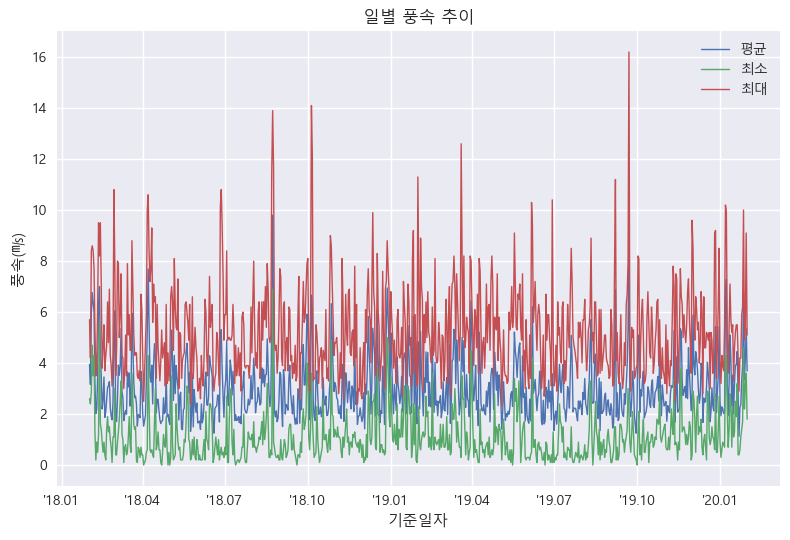

In [286]:
# 제주 일별 풍속 시각화
fig, ax = plt.subplots(1,1)

ax.plot(daily_ws_jeju['date'], daily_ws_jeju['ws_mean'], label='평균', lw=1)
ax.plot(daily_ws_jeju['date'], daily_ws_jeju['ws_min'], label='최소', lw=1)
ax.plot(daily_ws_jeju['date'], daily_ws_jeju['ws_max'], label='최대', lw=1)

ax.set_xlabel('기준일자')
ax.set_ylabel('풍속(㎧)')
ax.set_title('일별 풍속 추이')
ax.xaxis.set_minor_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))
ax.legend()

plt.tight_layout()
plt.show()

In [287]:
# 습도 일별 집계
daily_humid_jeju = daily_weather_jeju \
    >> mask(~X.humid.isna()) \
    >> mutate(date=X.datetime.str.slice(0,10)) \
    >> group_by(X.date) \
    >> summarise(humid_mean=X.humid.mean(), humid_max=X.humid.max(), humid_min=X.humid.min())
daily_humid_jeju['date'] = pd.to_datetime(daily_humid_jeju['date'])

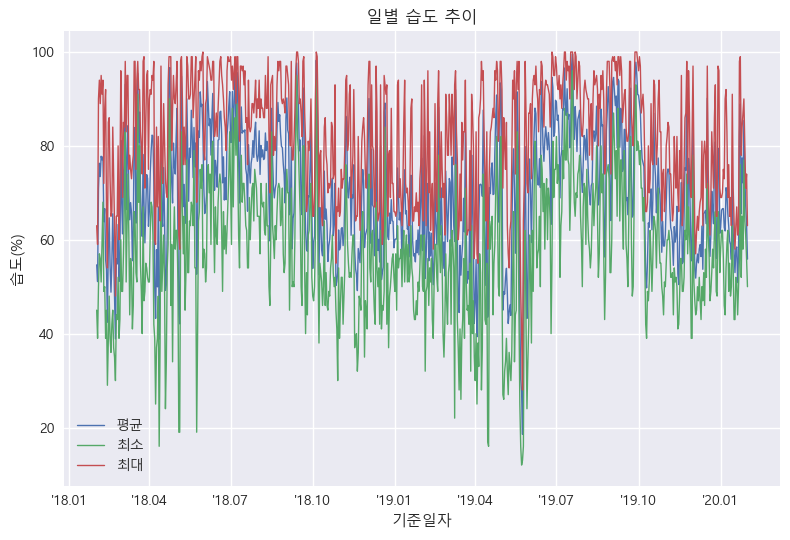

In [302]:
# 제주 일별 습도 시각화
fig, ax = plt.subplots(1,1)

ax.plot(daily_humid_jeju['date'], daily_humid_jeju['humid_mean'], label='평균', lw=1)
ax.plot(daily_humid_jeju['date'], daily_humid_jeju['humid_min'], label='최소', lw=1)
ax.plot(daily_humid_jeju['date'], daily_humid_jeju['humid_max'], label='최대', lw=1)

ax.set_xlabel('기준일자')
ax.set_ylabel('습도(%)')
ax.set_title('일별 습도 추이')
ax.xaxis.set_minor_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))
ax.legend()

plt.tight_layout()
plt.show()

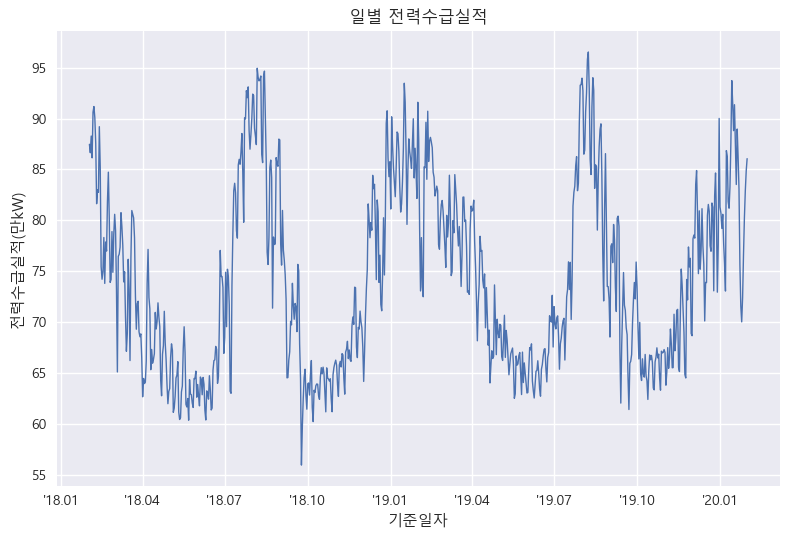

In [299]:
# 일별 전력수급실적 시각화
fig, ax = plt.subplots(1,1)

ax.plot(pd.to_datetime(target['date']), target['supply'], lw=1)

ax.set_xlabel('기준일자')
ax.set_ylabel('전력수급실적(만kW)')
ax.set_title('일별 전력수급실적')
ax.xaxis.set_minor_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))

plt.tight_layout()
plt.show()

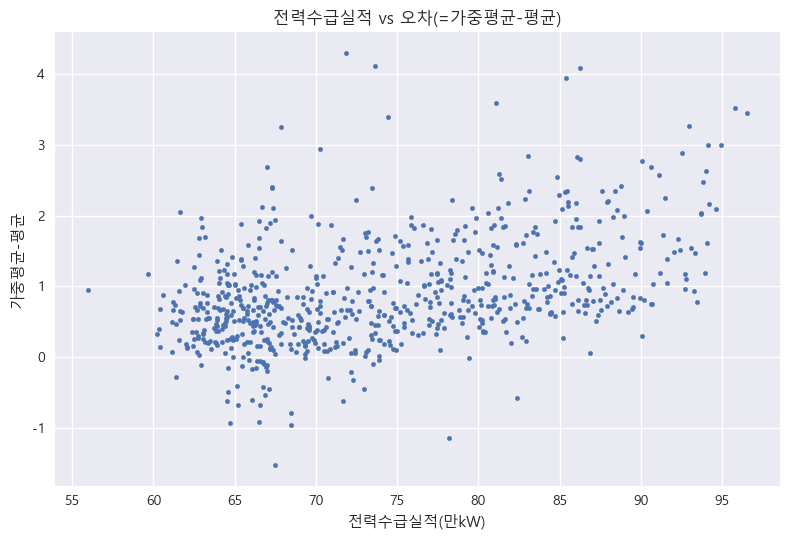

In [300]:
# 전력수급실적별 오차
fig, ax = plt.subplots(1,1)

ax.scatter(target['supply'], target['smp_mean']-daily_smp['smp_mean'], s=10)
ax.set_xlabel('전력수급실적(만kW)')
ax.set_ylabel('가중평균-평균')
ax.set_title('전력수급실적 vs 오차(=가중평균-평균)')
plt.tight_layout()
plt.show()